In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv('DATA.csv')

In [3]:
data.head()

,Car,Model,Volume,Weight,CO2,Unnamed: 5
0,Toyota,Aygo,1000,790,99,NaN
1,Mitsubishi,Space Star,1200,1160,95,NaN
2,Skoda,Citigo,1000,929,95,NaN
3,Fiat,500,900,865,90,NaN
4,Mini,Cooper,1500,1140,105,NaN


In [4]:
# Drop the last column
data = data.drop(columns=['Unnamed: 5'])

# Display the modified DataFrame
print(data)

           Car       Model  Volume  Weight  CO2
0       Toyota        Aygo    1000     790   99
1   Mitsubishi  Space Star    1200    1160   95
2        Skoda      Citigo    1000     929   95
3         Fiat         500     900     865   90
4         Mini      Cooper    1500    1140  105
5           VW         Up!    1000     929  105
6        Skoda       Fabia    1400    1109   90
7     Mercedes     A-Class    1500    1365   92
8         Ford      Fiesta    1500    1112   98
9         Audi          A1    1600    1150   99
10     Hyundai         I20    1100     980   99
11      Suzuki       Swift    1300     990  101
12        Ford      Fiesta    1000    1112   99
13       Honda       Civic    1600    1252   94
14      Hundai         I30    1600    1326   97
15        Opel       Astra    1600    1330   97
16         BMW           1    1600    1365   99
17       Mazda           3    2200    1280  104
18       Skoda       Rapid    1600    1119  104
19        Ford       Focus    2000    13

In [5]:
# Display basic information about the dataset
print("\nBasic information about the dataset:")
print(data.info())

# Summary statistics for numerical columns
print("\nSummary statistics for numerical columns:")
print(data.describe())

# Check for any missing values
print("\nMissing values in the dataset:")
print(data.isnull().sum())

# Check for duplicate rows
print("\nNumber of duplicate rows:")
print(data.duplicated().sum())

# Unique values in categorical columns
print("\nUnique values in categorical columns:")
print("Unique cars:", data['Car'].unique())
print("Unique models:", data['Model'].unique())


Basic information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Car     36 non-null     object
 1   Model   36 non-null     object
 2   Volume  36 non-null     int64 
 3   Weight  36 non-null     int64 
 4   CO2     36 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 1.5+ KB
None

Summary statistics for numerical columns:
            Volume       Weight         CO2
count    36.000000    36.000000   36.000000
mean   1611.111111  1292.277778  102.027778
std     388.975047   242.123889    7.454571
min     900.000000   790.000000   90.000000
25%    1475.000000  1117.250000   97.750000
50%    1600.000000  1329.000000   99.000000
75%    2000.000000  1418.250000  105.000000
max    2500.000000  1746.000000  120.000000

Missing values in the dataset:
Car       0
Model     0
Volume    0
Weight    0
CO2       0
dtype: int64

Number o

In [22]:
X = data[['Volume', 'Weight']]
y = data['CO2']

# Print features (X) and target variable (y)
print("Features (X):")
print(X.head())

print("\ntarget variable (y):")
print(y.head())

Features (X):
   Volume  Weight
0    1000     790
1    1200    1160
2    1000     929
3     900     865
4    1500    1140

target variable (y):
0     99
1     95
2     95
3     90
4    105
Name: CO2, dtype: int64


In [23]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

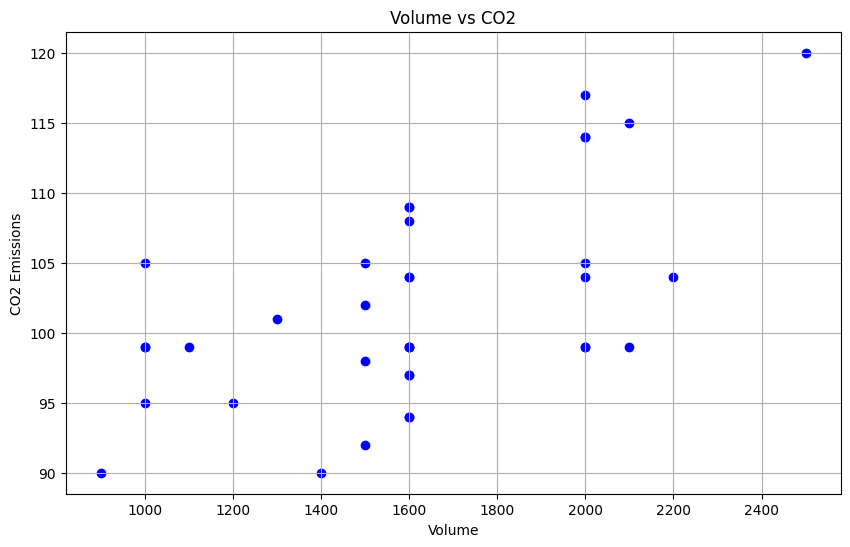

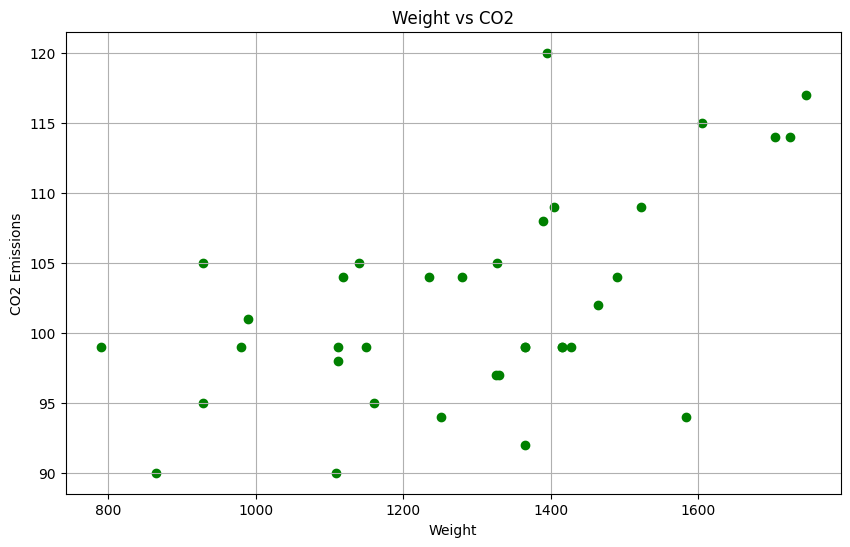

In [24]:
import matplotlib.pyplot as plt

# Scatter plot of Volume vs CO2
plt.figure(figsize=(10, 6))
plt.scatter(data['Volume'], data['CO2'], color='blue')
plt.title('Volume vs CO2')
plt.xlabel('Volume')
plt.ylabel('CO2 Emissions')
plt.grid(True)
plt.show()

# Scatter plot of Weight vs CO2
plt.figure(figsize=(10, 6))
plt.scatter(data['Weight'], data['CO2'], color='green')
plt.title('Weight vs CO2')
plt.xlabel('Weight')
plt.ylabel('CO2 Emissions')
plt.grid(True)
plt.show()


In [25]:
# Model training
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

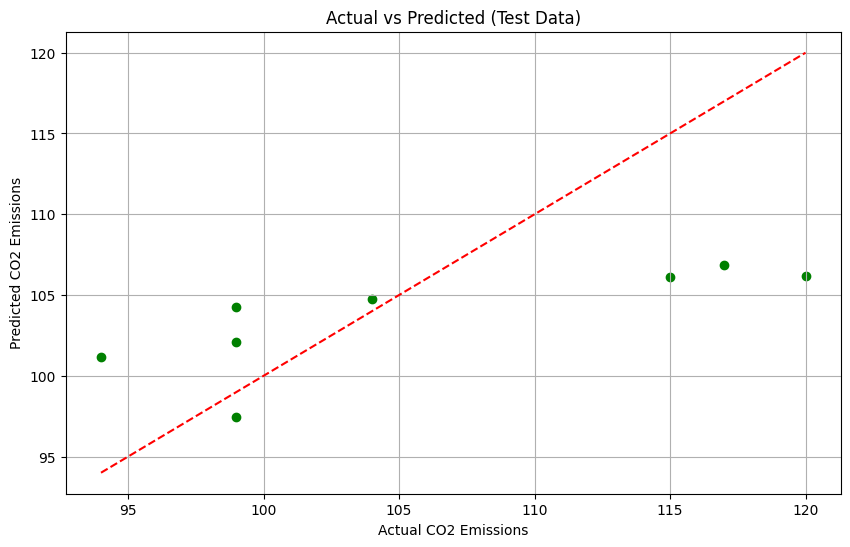

In [26]:
import matplotlib.pyplot as plt

# Make predictions on test data
test_preds = model.predict(X_test)

# Visualize predicted vs actual values for test data
plt.figure(figsize=(10, 6))
plt.scatter(y_test, test_preds, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')  # Plotting the diagonal line
plt.title('Actual vs Predicted (Test Data)')
plt.xlabel('Actual CO2 Emissions')
plt.ylabel('Predicted CO2 Emissions')
plt.grid(True)
plt.show()


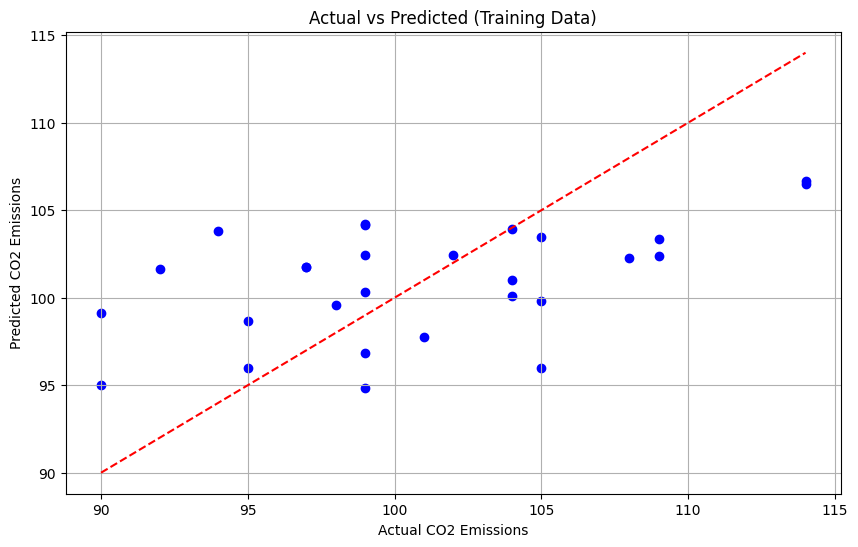

In [20]:
import matplotlib.pyplot as plt

# Make predictions on training data
train_preds = model.predict(X_train)

# Visualize predicted vs actual values for training data
plt.figure(figsize=(10, 6))
plt.scatter(y_train, train_preds, color='blue')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], '--', color='red')  # Plotting the diagonal line
plt.title('Actual vs Predicted (Training Data)')
plt.xlabel('Actual CO2 Emissions')
plt.ylabel('Predicted CO2 Emissions')
plt.grid(True)
plt.show()


In [27]:
# Model evaluation
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

In [28]:
train_mse = mean_squared_error(y_train, train_preds)
test_mse = mean_squared_error(y_test, test_preds)

print("Train MSE:", train_mse)
print("Test MSE:", test_mse)

Train MSE: 29.08577456530735
Test MSE: 58.07928583657771


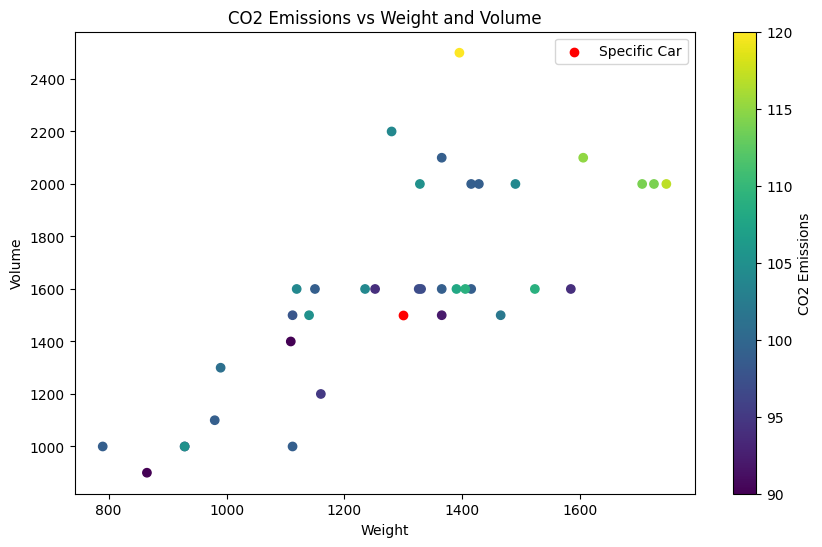

In [52]:
# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(data['Weight'], data['Volume'], c=data['CO2'], cmap='viridis')
plt.colorbar(label='CO2 Emissions')
plt.xlabel('Weight')
plt.ylabel('Volume')
plt.title('CO2 Emissions vs Weight and Volume')

# Add marker for specific car
plt.scatter(1300, 1500, color='red', label='Specific Car')  # Adjust weight and volume as needed
plt.legend()

plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Text(0.5, 0, 'CO2 Emissions')

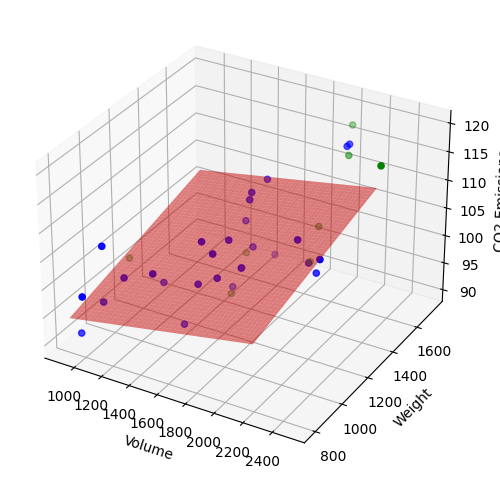

In [32]:
import pandas as pd
import numpy as np  # Add this line to import NumPy
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create 3D plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of training data
ax.scatter(X_train['Volume'], X_train['Weight'], y_train, color='blue', label='Training Data')
# Scatter plot of test data
ax.scatter(X_test['Volume'], X_test['Weight'], y_test, color='green', label='Test Data')

# Create meshgrid for plotting surface
volume_range = np.linspace(X_train['Volume'].min(), X_train['Volume'].max(), 50)
weight_range = np.linspace(X_train['Weight'].min(), X_train['Weight'].max(), 50)
volume_mesh, weight_mesh = np.meshgrid(volume_range, weight_range)
features = np.column_stack((np.ravel(volume_mesh), np.ravel(weight_mesh)))
co2_predictions = model.predict(features)
co2_mesh = co2_predictions.reshape(volume_mesh.shape)

# Plot linear regression surface
surf = ax.plot_surface(volume_mesh, weight_mesh, co2_mesh, color='red', alpha=0.5, label='Linear Regression')

ax.set_xlabel('Volume')
ax.set_ylabel('Weight')
ax.set_zlabel('CO2 Emissions')

In [34]:
import pandas
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X, y)

LinearRegression()

In [57]:

car_data = {'Volume': [2100], 'Weight': [1365]}  # Adjust volume and weight as needed
car_df = pd.DataFrame(car_data)

# Predict CO2 emission for the specific car
co2_prediction = model.predict(car_df)

print("Predicted CO2 Emission:", co2_prediction[0])

Predicted CO2 Emission: 104.20585662446103
